<a href="https://colab.research.google.com/github/ChristopMD/Machine-Learning/blob/main/Machine_Learning_techniques_(k_means%2C_SVM%2C_RF%2C_GB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning techniques (k-means, SVM, RF, GB)

* K-means
* Support Vector Machine
* Random Forest
* Gradient Boosting

##Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier

##Dataset

In [2]:
#Training data
train = pd.read_csv('churn-bigml-80.csv')

In [3]:
train["flag_muestra"] = "train"

In [4]:
#Testing data
test = pd.read_csv('churn-bigml-20.csv')

In [5]:
test["flag_muestra"] = "test"

In [6]:
data = train.append(test)

In [7]:
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train


In [8]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
flag_muestra               object
dtype: object

In [9]:
data['Area code'] = data['Area code'].astype(object)

In [10]:
data.dtypes

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
flag_muestra               object
dtype: object

##Data Preprocessing

In [11]:
#Juntamos la variables minutes una variable
data['Total minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes'] + data['Total intl minutes']

In [12]:
#Juntamos las variables de calls en una sola variable
total_calls = data['Total day calls'] + data['Total eve calls'] + data['Total night calls'] + data['Total intl calls']
data.insert(loc=len(data.columns), column='Total calls', value=total_calls)

In [13]:
#Juntamos la variables charge en una sola variable
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge'] + data['Total intl charge']

In [14]:
#Rename variables
data = data.rename(columns = {'International plan':'International_plan'})
data = data.rename(columns = {'Voice mail plan':'Voice_mail_plan'})

In [15]:
data.head(5)

,State,Account length,Area code,International_plan,Voice_mail_plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra,Total minutes,Total calls,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train,717.2,303,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train,625.2,332,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train,539.4,333,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train,564.8,255,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train,512.0,359,52.09


In [16]:
#Crear variables binarizadas
data['c_International_plan'] = LabelEncoder().fit_transform(data.International_plan.values)
data['c_Voice_mail_plan'] = LabelEncoder().fit_transform(data.Voice_mail_plan.values)

In [17]:
data.head(5)

,State,Account length,Area code,International_plan,Voice_mail_plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra,Total minutes,Total calls,Total charge,c_International_plan,c_Voice_mail_plan
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train,717.2,303,75.56,0,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train,625.2,332,59.24,0,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train,539.4,333,62.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train,564.8,255,66.80,1,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train,512.0,359,52.09,1,0


In [18]:
#X: Variables y Y: Target
X = data[['c_International_plan','c_Voice_mail_plan','Number vmail messages','Total minutes', 'Total calls','Total charge','Customer service calls']]
y = data['Churn']

In [19]:
X.dtypes

c_International_plan        int64
c_Voice_mail_plan           int64
Number vmail messages       int64
Total minutes             float64
Total calls                 int64
Total charge              float64
Customer service calls      int64
dtype: object

In [20]:
#Pregunta 1

In [21]:
#a) Presentar la matriz de correlación haciendo uso adecuado de las variables. Comentar los resultados. (2 puntos)

##Heatmap for quantitative variables

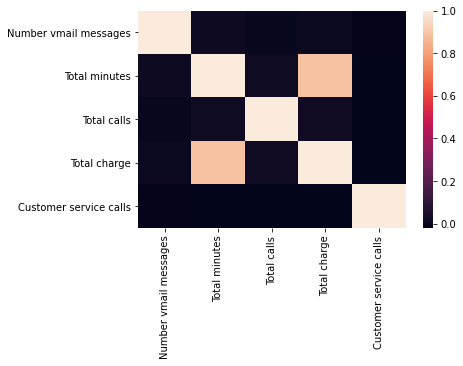

In [22]:
#Heatmap para las variables cuantitativas
sns.heatmap(X.loc[:,['Number vmail messages','Total minutes', 'Total calls','Total charge', 'Customer service calls']].corr())
plt.show()

**De la Gráfica del Heatmap podemos decir que:**

La variable "Number vmail mesages" no tiene correlacion con las otras variables, lo cual nos dice que tiene un aporte distinto a las demas variables.

La variable "Total minutes"  tiene correlacion con la variable "Total charge", lo cual nos dice que tiene un MISMO aporte que esta variable, por lo cual se recomienda descartar una de ellas.

La variable "Total calls" no tiene correlacion con las otras variables, lo cual nos dice que tiene un aporte distinto a las demas variables.

La variable "Total charge"  tiene correlacion con la variable "Total minutes", lo cual nos dice que tiene un MISMO aporte que esta variable, por lo cual se recomienda descartar una de ellas.

La variable "Customer service calls" no tiene correlacion con las otras variables, lo cual nos dice que tiene un aporte distinto a las demas variables.

##Correlation Test

**Prueba de Correlación:**

Ho: no existe correlación entre las variables = >5%

Ha: existe correlación entre las variables = < 5%

In [25]:
#Correlacion entre las variables independientes
ss.spearmanr(data['Number vmail messages'],data['Total minutes'])

SpearmanrResult(correlation=0.013883388184036307, pvalue=0.42298364640016006)

In [26]:
ss.spearmanr(data['Number vmail messages'],data['Total calls'])

SpearmanrResult(correlation=-0.0028452053259133865, pvalue=0.8695748735825533)

In [27]:
ss.spearmanr(data['Number vmail messages'],data['Total charge'])

SpearmanrResult(correlation=0.010399236749992796, pvalue=0.5483987959981619)

In [28]:
ss.spearmanr(data['Number vmail messages'],data['Customer service calls'])

SpearmanrResult(correlation=-0.019639487465458686, pvalue=0.25699860952874515)

In [29]:
ss.spearmanr(data['Total minutes'],data['Total calls'])

SpearmanrResult(correlation=0.013886833426594285, pvalue=0.42286855789526445)

In [30]:
ss.spearmanr(data['Total minutes'],data['Total charge'])

SpearmanrResult(correlation=0.8802417841717907, pvalue=0.0)

In [31]:
ss.spearmanr(data['Total minutes'],data['Customer service calls'])

SpearmanrResult(correlation=-0.02524241430371465, pvalue=0.14512076871716872)

In [32]:
ss.spearmanr(data['Total calls'],data['Total charge'])

SpearmanrResult(correlation=0.016780360946673012, pvalue=0.33280922258645274)

In [33]:
ss.spearmanr(data['Total calls'],data['Customer service calls'])

SpearmanrResult(correlation=-0.01394796731631684, pvalue=0.42082942742480445)

In [34]:
ss.spearmanr(data['Total charge'],data['Customer service calls'])

SpearmanrResult(correlation=-0.02467585149184646, pvalue=0.15436769126789038)

**De la prueba de correlacion para las variables cuantitativas podemos decir que:**

Solo las variables "Total minutes" y "Total charge" muestran correlacion entre ellas, ya que su p-value es menor a 5%. Por lo tanto es recomendable descartar alguna de ellas, ya que ambas aportan los mismo.

##K-means

In [35]:
#Data preprocessing for K-means
data_X = X.drop('c_International_plan', 1)
data_X = data_X.drop('c_Voice_mail_plan', 1)

In [36]:
data_X.head(5)

,Number vmail messages,Total minutes,Total calls,Total charge,Customer service calls
0,25,717.2,303,75.56,1
1,26,625.2,332,59.24,1
2,0,539.4,333,62.29,0
3,0,564.8,255,66.80,2
4,0,512.0,359,52.09,3


In [38]:
#Función para determinar el mejor k (número de segmentos) para el modelo K-means
def graf_silt_seg(data_X, n):
  lst_segmentos = []
  lst_siluetas = []
  data_X_scale = pd.DataFrame(StandardScaler().fit_transform(data_X))
  data_X_scale.columns = ["Number vmail messages","Total minutes","Total calls","Total charge","Customer service calls"]
  data_X_scale.head()
  for i in range(2, n): #el minimo siempre es 2
    lst_segmentos.append(i)
    kmeans = KMeans(n_clusters=i).fit(data_X_scale)
    labels = pd.DataFrame(kmeans.predict(data_X_scale))
    labels.columns = ['segmento']
    silhouette_avg = silhouette_score(data_X, labels)
    lst_siluetas.append(silhouette_avg)

  plt.title("Segmentos vs Siluetas")
  plt.bar(lst_segmentos, lst_siluetas, color ='orange',width = 0.5)
  plt.xlabel("Segmentos")
  plt.ylabel("Ancho de silueta")
  plt.axis('tight')
  plt.show()
  indice_max = lst_siluetas.index(max(lst_siluetas))
  print("El mejor número de segmentos es ", lst_segmentos[indice_max])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

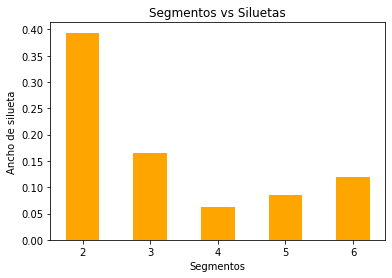

El mejor número de segmentos es  2


In [39]:
graf_silt_seg(data_X, 7)

##Machine Learning techniques

In [41]:
#Usamos la data "X"
X.head(5)

,c_International_plan,c_Voice_mail_plan,Number vmail messages,Total minutes,Total calls,Total charge,Customer service calls
0,0,1,25,717.2,303,75.56,1
1,0,1,26,625.2,332,59.24,1
2,0,0,0,539.4,333,62.29,0
3,1,0,0,564.8,255,66.80,2
4,1,0,0,512.0,359,52.09,3


In [42]:
X = X.to_numpy()
y = y.to_numpy()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [44]:
#Standarizacion
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

###Support Vector Machine

In [46]:
#SVM
classifier_SVM = SVC(kernel='linear',probability=True).fit(X_train, y_train)

In [47]:
y_pred_SVM = classifier_SVM.predict(X_test)

In [49]:
y_pred_prob_SVM = classifier_SVM.predict_proba(X_test)

In [50]:
false_positive_rate_SVM, true_positive_rate_SVM, thresholds_SVM = roc_curve(y_test, y_pred_prob_SVM[:,1])

In [51]:
#ROC SVM
roc_auc_SVM = auc(false_positive_rate_SVM, true_positive_rate_SVM)
roc_auc_SVM

0.7897793263646922

La curva AUC para el modelo de SVM es de 0.79

###Random Forest

In [53]:
#Random Forest

In [54]:
classifier_RanF = RandomForestClassifier().fit(X_train, y_train) #default=100 arboles

In [55]:
y_pred_RandF = classifier_RanF.predict(X_test)

In [57]:
y_pred_prob_RandF = classifier_RanF.predict_proba(X_test)

In [58]:
false_positive_rate_RandF, true_positive_rate_RandF, thresholds_RandF = roc_curve(y_test, y_pred_prob_RandF[:,1])

In [59]:
#Roc Random Forest
roc_auc_RandF = auc(false_positive_rate_RandF, true_positive_rate_RandF)
roc_auc_RandF

0.9212843280506537

La curva AUC para el modelo de Random Forest es de 0.92

###Gradient Boosting

In [61]:
#Boosting

In [62]:
classifier_Boost = GradientBoostingClassifier().fit(X_train, y_train)

In [63]:
y_pred_Boost = classifier_Boost.predict(X_test)

In [65]:
y_pred_prob_Boost = classifier_Boost.predict_proba(X_test)

In [66]:
false_positive_rate_Boost, true_positive_rate_Boost, thresholds_Boost = roc_curve(y_test, y_pred_prob_Boost[:,1])

In [67]:
#Roc Boosting
roc_auc_Boost = auc(false_positive_rate_Boost, true_positive_rate_Boost)
roc_auc_Boost

0.8564872054250496

La curva AUC para el modelo de Gradient Boosting es de 0.86

###Confusion Matrix

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [85]:
#Classifiers
classifiers = [SVC(kernel='linear',probability=True),
               RandomForestClassifier(), 
               GradientBoostingClassifier()]

In [86]:
def confu_matrix(classifiers, X_train, X_test, y_train, y_test):

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

  for cls, ax in zip(classifiers, axes.flatten()):
    if classifiers.index(cls) == 0:
      X_train = StandardScaler().fit_transform(X_train)
      X_test = StandardScaler().fit_transform(X_test)
    cls.fit(X_train, y_train)
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         normalize= 'true')
    ax.title.set_text(type(cls).__name__)
  plt.tight_layout()  
  plt.show()

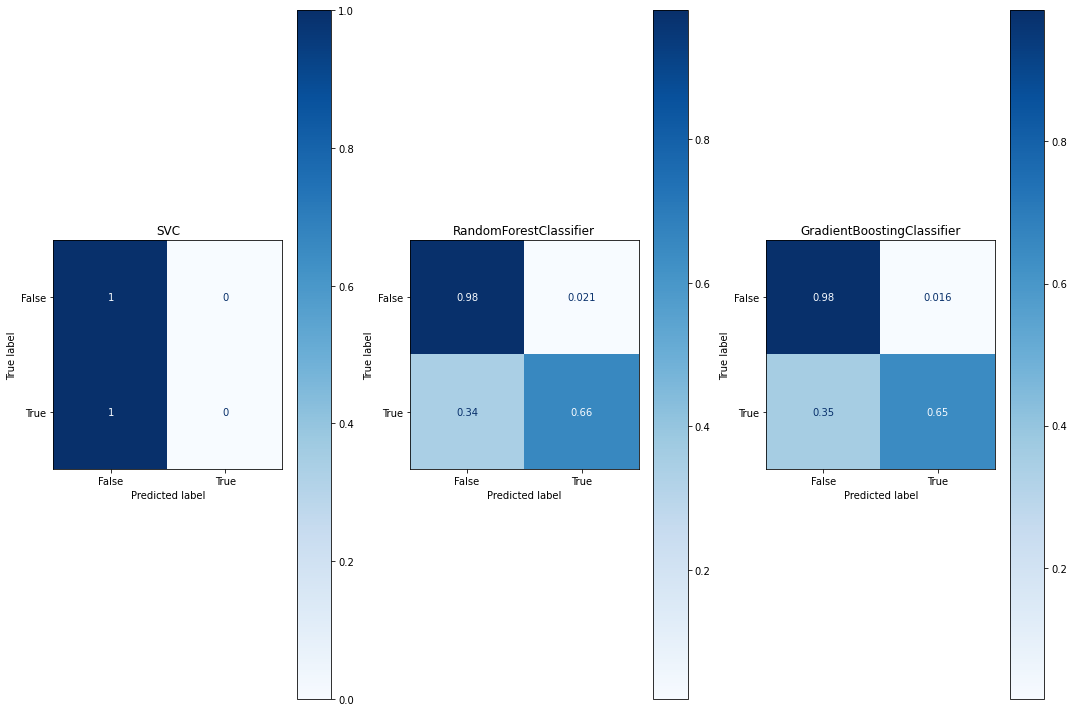

In [87]:
confu_matrix(classifiers, X_train, X_test, y_train, y_test)

* **Support Vector Machine**

Sensibilidad: 0% -> De 100 clientes que se han dado de baja el modelo identifica a 0

Especificidad: 100% -> De 100 clientes que No han se han dado el modelo identifica a 100

* **Random Forest Classifier**

Sensibilidad: 66% -> De 100 clientes que se han dado de baja el modelo identifica a 66

Especificidad: 98% -> De 100 clientes que No han se han dado el modelo identifica a 98

* **Gradient Boosting**

Sensibilidad: 65% -> De 100 clientes que se han dado de baja el modelo identifica a 65

Especificidad: 98% -> De 100 clientes que No han se han dado el modelo identifica a 98

##AUC-ROC Curve

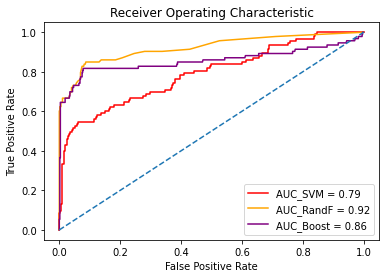

In [88]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_SVM,true_positive_rate_SVM, color='red',label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.plot(false_positive_rate_RandF,true_positive_rate_RandF, color='orange',label = 'AUC_RandF = %0.2f' % roc_auc_RandF)
plt.plot(false_positive_rate_Boost,true_positive_rate_Boost, color='purple',label = 'AUC_Boost = %0.2f' % roc_auc_Boost)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* **Conclusiones:**

Comparando las 3 matrices de confusion podemos descartar el modelo SVM, ya que tiene un sansibilidad de 0%, mientras que los otros modelos tienen una sensibilidad mayor a 60%

De igual manera analizando la curva roc podemos decir que el mejor modelo es Random Forest, ya que su curva roc es de 0.91